<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


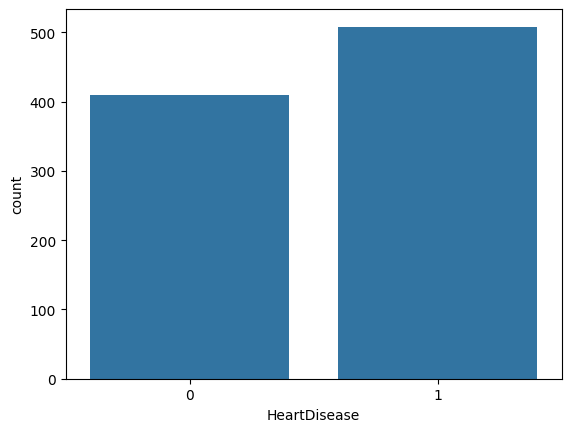

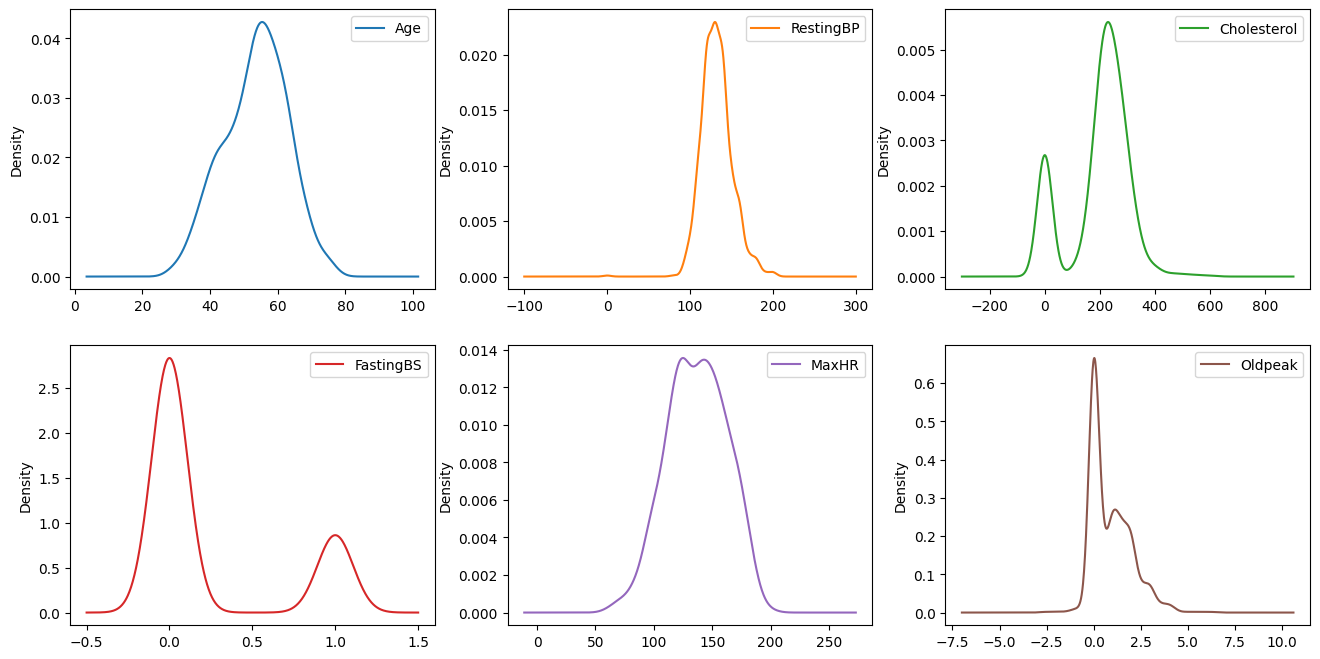

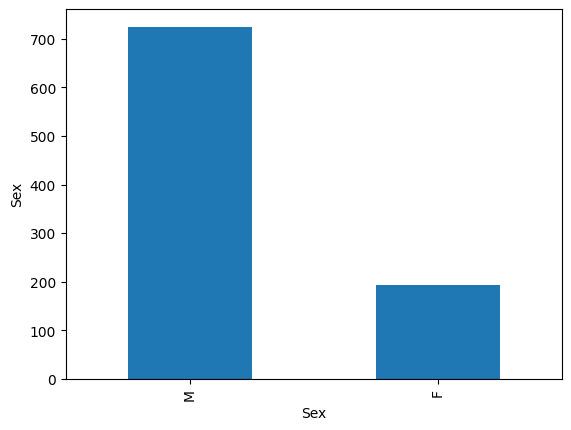

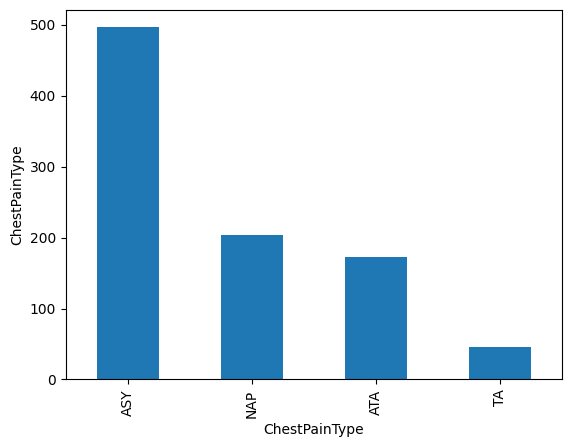

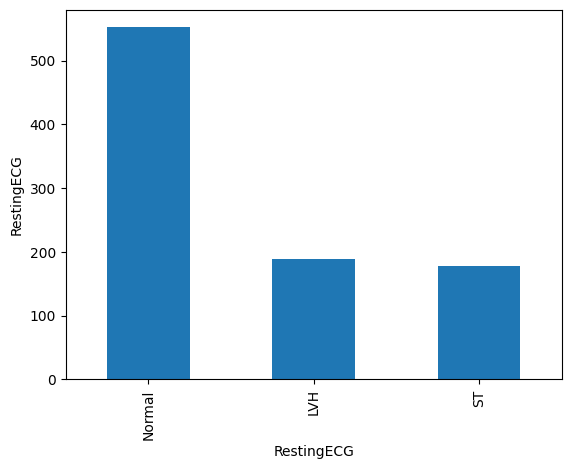

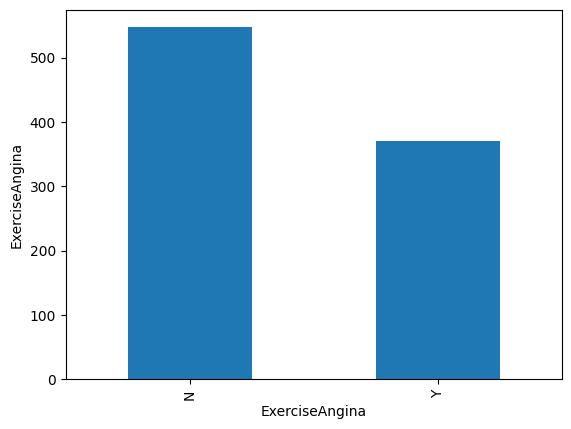

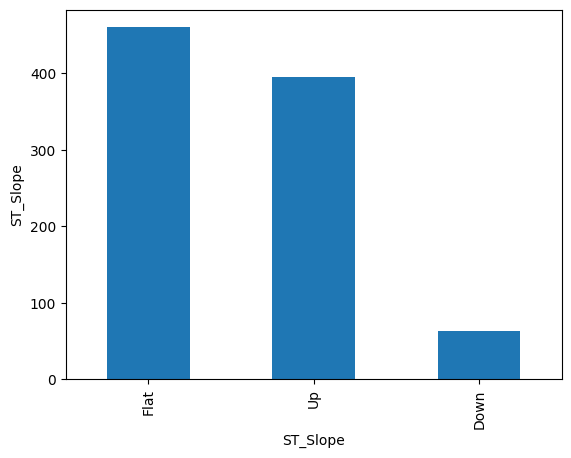

model accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.85      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

model accuracy: SVC()
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       112
           1       0.79      0.73      0.76       164

    accuracy                           0.72       276
   macro avg       0.72      0.72      0.72       276
weighted avg       0.73      0.72      0.73       276

model accuracy: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       112
           1       0.77      0.74      0.76       164

    accuracy                           0.71       276
   macro avg       0.70      0.7

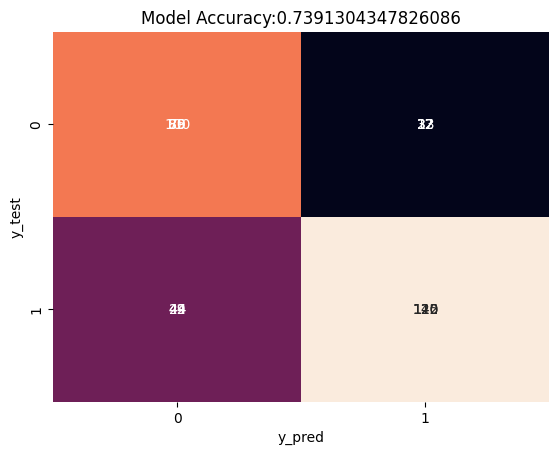

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/MachineLearning/Data/heart.csv")

df.head()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

df.shape

columns = df.columns
columns

df.info()

df.isnull().sum()

df.describe().T

sns.countplot(x = "HeartDisease", data = df)
df.loc[:, 'HeartDisease'].value_counts()

categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()
# ---------------------------------------------------------
final_numeric_feature = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak']

df[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

for i in range(len(final_categorical_feature)):
    df[final_categorical_feature[i]].value_counts().plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.ylabel(final_categorical_feature[i])
    plt.show()

df_categoric=df.select_dtypes(include=["object"]).copy()

df_categoric

df_columns=df_categoric.columns

df_columns

from sklearn.preprocessing import LabelEncoder
for i in df_columns:
  lbe=LabelEncoder()
  df[i]=lbe.fit_transform(df[i])

df.head()

y=df["HeartDisease"]
X=df.drop(["HeartDisease"],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

"""##Logistic Regression"""

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
log_score=accuracy_score(y_test,y_pred)
print("model accuracy:", log_score)

confusionmatrix_log=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix_log, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(log_score))

print(classification_report(y_test, y_pred))

"""##SVM"""

svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
SVM_score=accuracy_score(y_test,y_pred)
print("model accuracy:", svm_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(SVM_score))
print(classification_report(y_test, y_pred))

"""##KNN"""

knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn_score=accuracy_score(y_test,y_pred)
print("model accuracy:", knn_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(knn_score))
print(classification_report(y_test, y_pred))

"""##Decision Tree"""

tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)
tree_score=accuracy_score(y_test,y_pred)
print("model accuracy:", tree_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(tree_score))
print(classification_report(y_test, y_pred))